In [1]:
#link google drive

from google.colab import drive

drive.mount('/content/drive', force_remount=True)

#install any necessary packages to the colab env
!pip install wfdb
!pip install neurokit2
!pip install py-ecg-detectors
!pip install bigO

#from each package import relevant functions
import os
os.getcwd()
new_direct = "/content/drive/MyDrive/Colab_Notebooks/CiC_project/Orphanidou "
os.chdir(new_direct)
from orphanidou import assess_qual

path = '/content/drive/MyDrive/Colab_Notebooks/CiC_project/Automated_ecg_assessment_og'
os.chdir(path)
from toolbox.AlgorithmsV5_k_model import processing

import os
path = '/content/drive/MyDrive/Colab_Notebooks/CiC_project/ECGAssess_og'
os.chdir(path)
from Code.AlgorithmsV5 import processing1

import os
new_direct = "/content/drive/MyDrive/Colab_Notebooks/CiC_project/framework_for_synthetic_biosignals"
os.chdir(new_direct)
# %matplotlib widget

import ecg_generator as eg
import noise_generator as ng
import beat_interval_generator as big
import tensorflow as tf

import sys
path = '/content/drive/MyDrive/Colab_Notebooks/CiC_project'
os.chdir(path)

from functions import plotting_df
from functions import first_below_05

#other tools to use
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal
from ecgdetectors import Detectors
import scipy.stats
import neurokit2 as nk
import time
import tensorflow as tf
import pandas as pd


Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.2/689.2 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 554.5/554.5 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gatspy: filename=gatspy-0.3-py3-none-any.whl size=43804 sha256=2b9663e97dcc4a19fd50031dc788dfa17a6bbadc6f6be216df3bdc6a8bdaec09
  Stored in directory: /root/.cache/pip/wheels/13/39/c2/d113611d276bf55252ed5a640e98596d7dcc96535afbf254d5
Successfully built gatspy


In [2]:
path = '/content/drive/MyDrive/Colab_Notebooks/CiC_work/framework_for_synthetic_biosignals/beats_array.npy'
beats2 = np.load(path)

Signal Power: 0.035130962790604854
SNR: 0.017565481395302427
SNR (dB): -17.55339943540125
Signal Power (with added WN): 0.037074903623947233


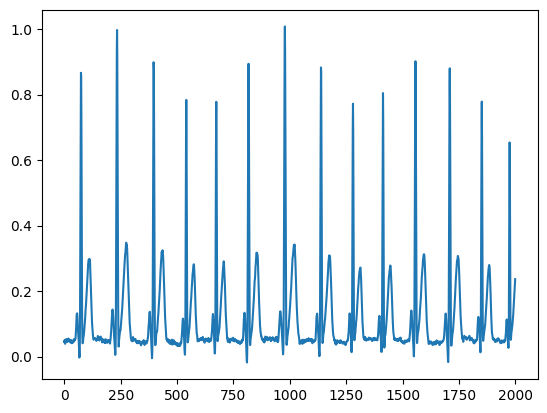

In [11]:
#first lets calculate the clean signal with no whitenoise

ecg = eg.ECGGenerator()
ecg.beat_interval_generator.beat_intervals = beats2
ecg.noise_generator.noise_type.wn = 0
signal, peaks, labels, beats = ecg.generate()

#get first 10 seconds of the signal
signal = signal[0:2000]

#plot the signal
plt.plot(signal)
N = len(signal)


# Step 1: Square the signal values
squared_signal = np.square(signal)

# Step 2: Compute the mean of the squared values to get the power
sum_squared_signal = np.sum(squared_signal)

signal_power = sum_squared_signal/N

sigma_sq = 2

SNR = signal_power/sigma_sq
SNR_dB = 10 * np.log10(SNR)

print("Signal Power:", signal_power)
print("SNR:", SNR)
print("SNR (dB):", SNR_dB)

#now generate a signal with the amount of sigma_sq white noise to look at the signal power calculation to double check the SNR
ecg = eg.ECGGenerator()
ecg.beat_interval_generator.beat_intervals = beats2
ecg.noise_generator.noise_type.wn = 2
signal_2, peaks, labels, beats = ecg.generate()
signal_2 = signal_2[0:2000]

squared_signal_2 = np.square(signal_2)
sum_squared_signal_2 = np.sum(squared_signal_2)
signal_power_2 = sum_squared_signal_2/N
print("Signal Power (with added WN):", signal_power_2)



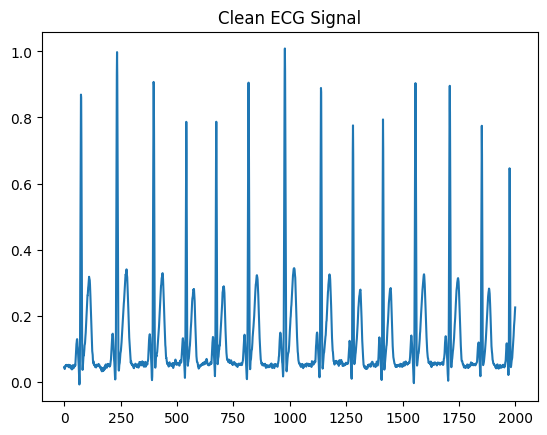

Clean Signal Power: 0.03603402895422696
SNR (linear scale): 0.01801701447711348
SNR (dB): -17.44317172487699


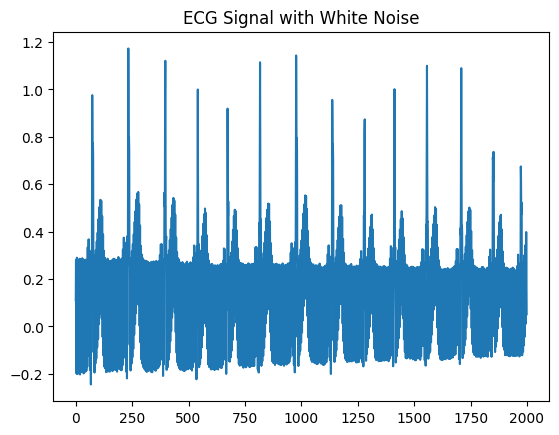

Signal Power (with added WN): 0.05866417026623307
Noise Power: 0.022666254255202134
SNR from Noisy Signal (linear scale): 2.588172249623868
SNR from Noisy Signal (dB): 4.1299317639071145


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import ecg_generator as eg  # Assuming this is the module you are using

# Generate the clean ECG signal
ecg = eg.ECGGenerator()
ecg.beat_interval_generator.beat_intervals = beats2
ecg.noise_generator.noise_type.wn = 0  # No white noise
signal, peaks, labels, beats = ecg.generate()

# Get the first 10 seconds of the signal
signal = signal[:2000]

# Plot the clean signal
plt.plot(signal)
plt.title('Clean ECG Signal')
plt.show()

# Calculate the signal power for the clean signal
N = len(signal)
squared_signal = np.square(signal)
sum_squared_signal = np.sum(squared_signal)
signal_power = sum_squared_signal / N

# Given noise power (sigma^2)
sigma_sq = 2

# Calculate SNR based on the clean signal power and noise power
SNR = signal_power / sigma_sq
SNR_dB = 10 * np.log10(SNR)

print("Clean Signal Power:", signal_power)
print("SNR (linear scale):", SNR)
print("SNR (dB):", SNR_dB)

# Generate the noisy ECG signal
ecg = eg.ECGGenerator()
ecg.beat_interval_generator.beat_intervals = beats2
ecg.noise_generator.noise_type.point_bool = True
ecg.noise_generator.noise_type.point_freq = 0.5
ecg.noise_generator.noise_type.point_value = 170 # set PLI to 5
signal_2, peaks, labels, beats = ecg.generate()
signal_2 = signal_2[:2000]

# Plot the noisy signal
plt.plot(signal_2)
plt.title('ECG Signal with White Noise')
plt.show()

# Calculate the signal power for the noisy signal
squared_signal_2 = np.square(signal_2)
sum_squared_signal_2 = np.sum(squared_signal_2)
signal_power_2 = sum_squared_signal_2 / N

print("Signal Power (with added WN):", signal_power_2)

# Additional Verification
# Calculate the noise added
noise_added = signal_2 - signal
squared_noise = np.square(noise_added)
sum_squared_noise = np.sum(squared_noise)
noise_power = sum_squared_noise / N

print("Noise Power:", noise_power)

# Calculate the SNR directly from the noisy signal
SNR_noisy = signal_power_2 / noise_power
SNR_noisy_dB = 10 * np.log10(SNR_noisy)

print("SNR from Noisy Signal (linear scale):", SNR_noisy)
print("SNR from Noisy Signal (dB):", SNR_noisy_dB)


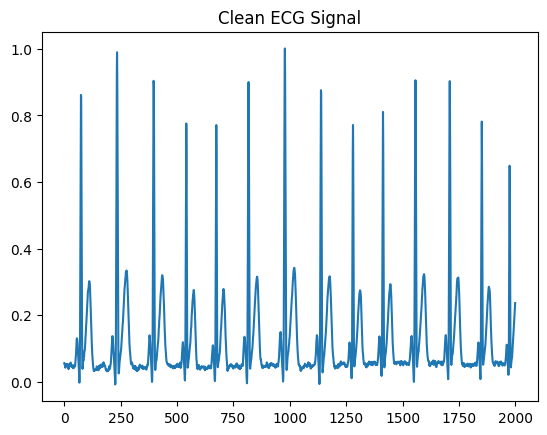

Clean Signal Power: 0.03525928109336738
SNR (linear scale): 0.0014691367122236408
SNR (dB): -28.32937788551662


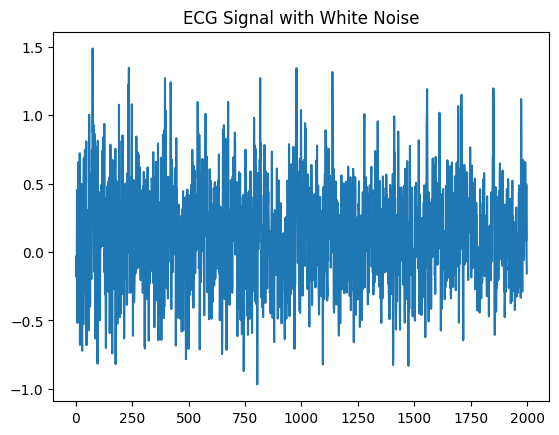

Signal Power (with added WN): 0.14526218861079251
Noise Power: 0.10713017103836259
SNR from Noisy Signal (linear scale): 1.355940975383817
SNR from Noisy Signal (dB): 1.322407849417917


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import ecg_generator as eg  # Assuming this is the module you are using

# Generate the clean ECG signal
ecg = eg.ECGGenerator()
ecg.beat_interval_generator.beat_intervals = beats2
ecg.noise_generator.noise_type.wn = 0  # No white noise
signal, peaks, labels, beats = ecg.generate()

# Get the first 10 seconds of the signal
signal = signal[:2000]

# Plot the clean signal
plt.plot(signal)
plt.title('Clean ECG Signal')
plt.show()

# Calculate the signal power for the clean signal
N = len(signal)
squared_signal = np.square(signal)
sum_squared_signal = np.sum(squared_signal)
signal_power = sum_squared_signal / N

# Given noise power (sigma^2)
sigma_sq = 24

# Calculate SNR based on the clean signal power and noise power
SNR = signal_power / sigma_sq
SNR_dB = 10 * np.log10(SNR)

print("Clean Signal Power:", signal_power)
print("SNR (linear scale):", SNR)
print("SNR (dB):", SNR_dB)

# Generate the noisy ECG signal
ecg = eg.ECGGenerator()
ecg.beat_interval_generator.beat_intervals = beats2
ecg.noise_generator.noise_type.wn = 148  # Set white noise to 2
signal_2, peaks, labels, beats = ecg.generate()
signal_2 = signal_2[:2000]

# Plot the noisy signal
plt.plot(signal_2)
plt.title('ECG Signal with White Noise')
plt.show()

# Calculate the signal power for the noisy signal
squared_signal_2 = np.square(signal_2)
sum_squared_signal_2 = np.sum(squared_signal_2)
signal_power_2 = sum_squared_signal_2 / N

print("Signal Power (with added WN):", signal_power_2)

# Additional Verification
# Calculate the noise added
noise_added = signal_2 - signal
squared_noise = np.square(noise_added)
sum_squared_noise = np.sum(squared_noise)
noise_power = sum_squared_noise / N

print("Noise Power:", noise_power)

# Calculate the SNR directly from the noisy signal
SNR_noisy = signal_power_2 / noise_power
SNR_noisy_dB = 10 * np.log10(SNR_noisy)

print("SNR from Noisy Signal (linear scale):", SNR_noisy)
print("SNR from Noisy Signal (dB):", SNR_noisy_dB)


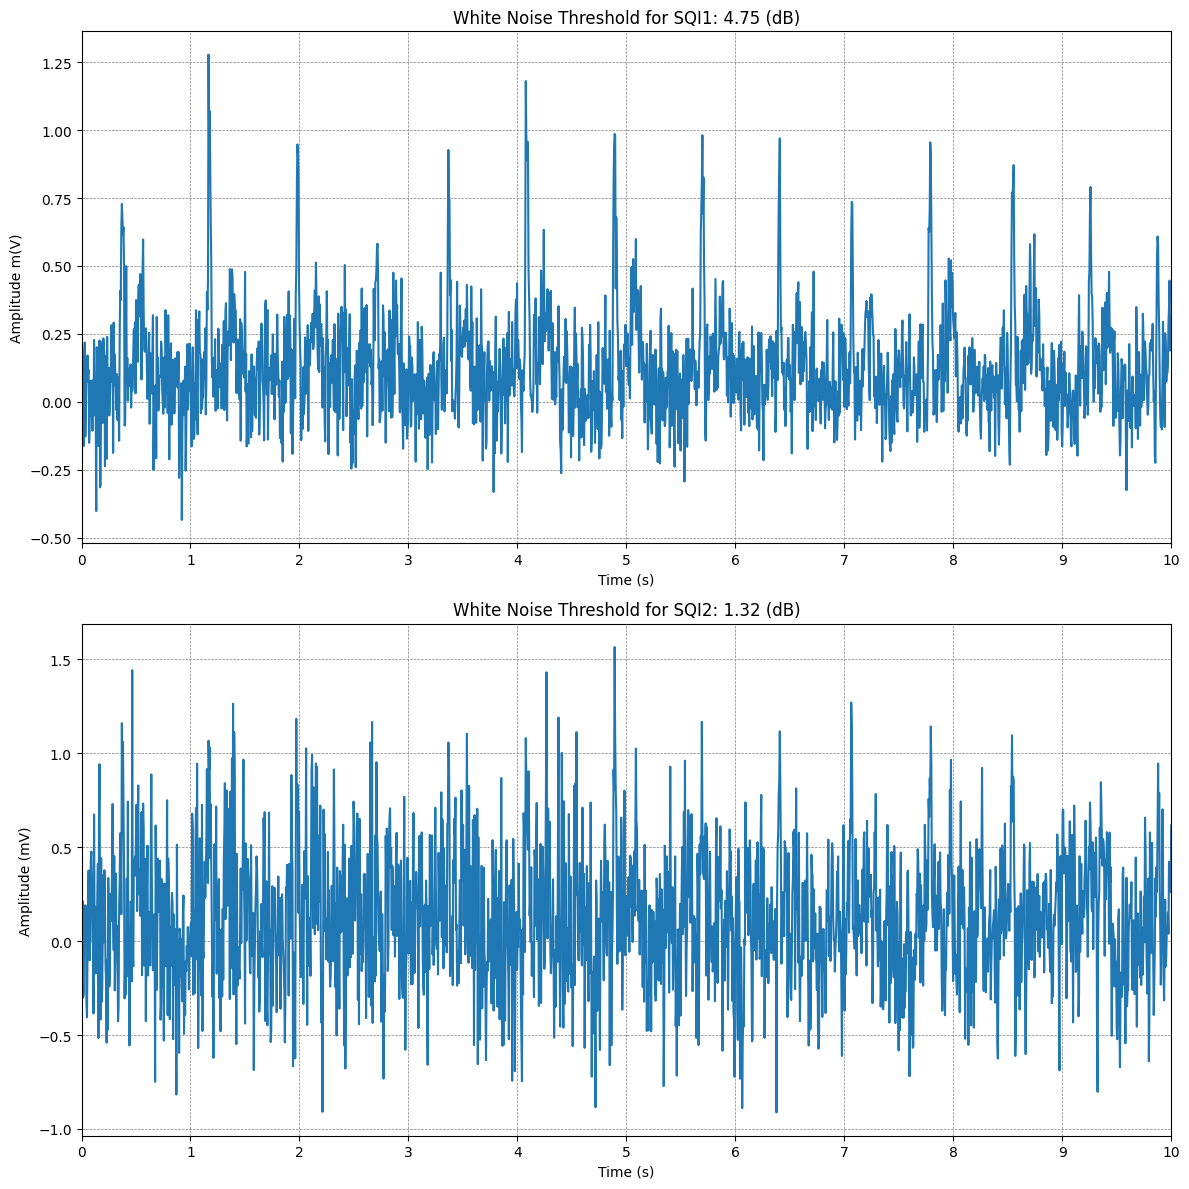

In [31]:
# Generate the noisy ECG signal
ecg = eg.ECGGenerator()
ecg.beat_interval_generator.beat_intervals = beats2
ecg.noise_generator.noise_type.wn = 24  # Set white noise to 2
signal_2, peaks, labels, beats = ecg.generate()
signal_2 = signal_2[:2000]

# Generate the noisy ECG signal
ecg = eg.ECGGenerator()
ecg.beat_interval_generator.beat_intervals = beats2
ecg.noise_generator.noise_type.wn = 148  # Set white noise to 2
signal_3, peaks, labels, beats = ecg.generate()
signal_3 = signal_3[:2000]
plt.figure(figsize=(12, 12))


total_time = 10
time = np.linspace(0, total_time, len(signal_2))

# Plot for signal_2
plt.subplot(2, 1, 1)


# Plot for signal_2
plt.subplot(2, 1, 1)
plt.plot(time, signal_2)
plt.grid(True, which='both', linestyle='--', color='gray', linewidth=0.5)
plt.title('White Noise Threshold for SQI1: 4.75 (dB)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude m(V)')
plt.xticks(np.arange(0, 11, 1))
plt.xlim(0, 10)


# Plot for signal_3
plt.subplot(2, 1, 2)
plt.plot(time, signal_3)
plt.grid(True, which='both', linestyle='--', color='gray', linewidth=0.5)
plt.title('White Noise Threshold for SQI2: 1.32 (dB)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.xticks(np.arange(0, 11, 1))
plt.xlim(0, 10)

plt.tight_layout()
plt.show()




plt.show()

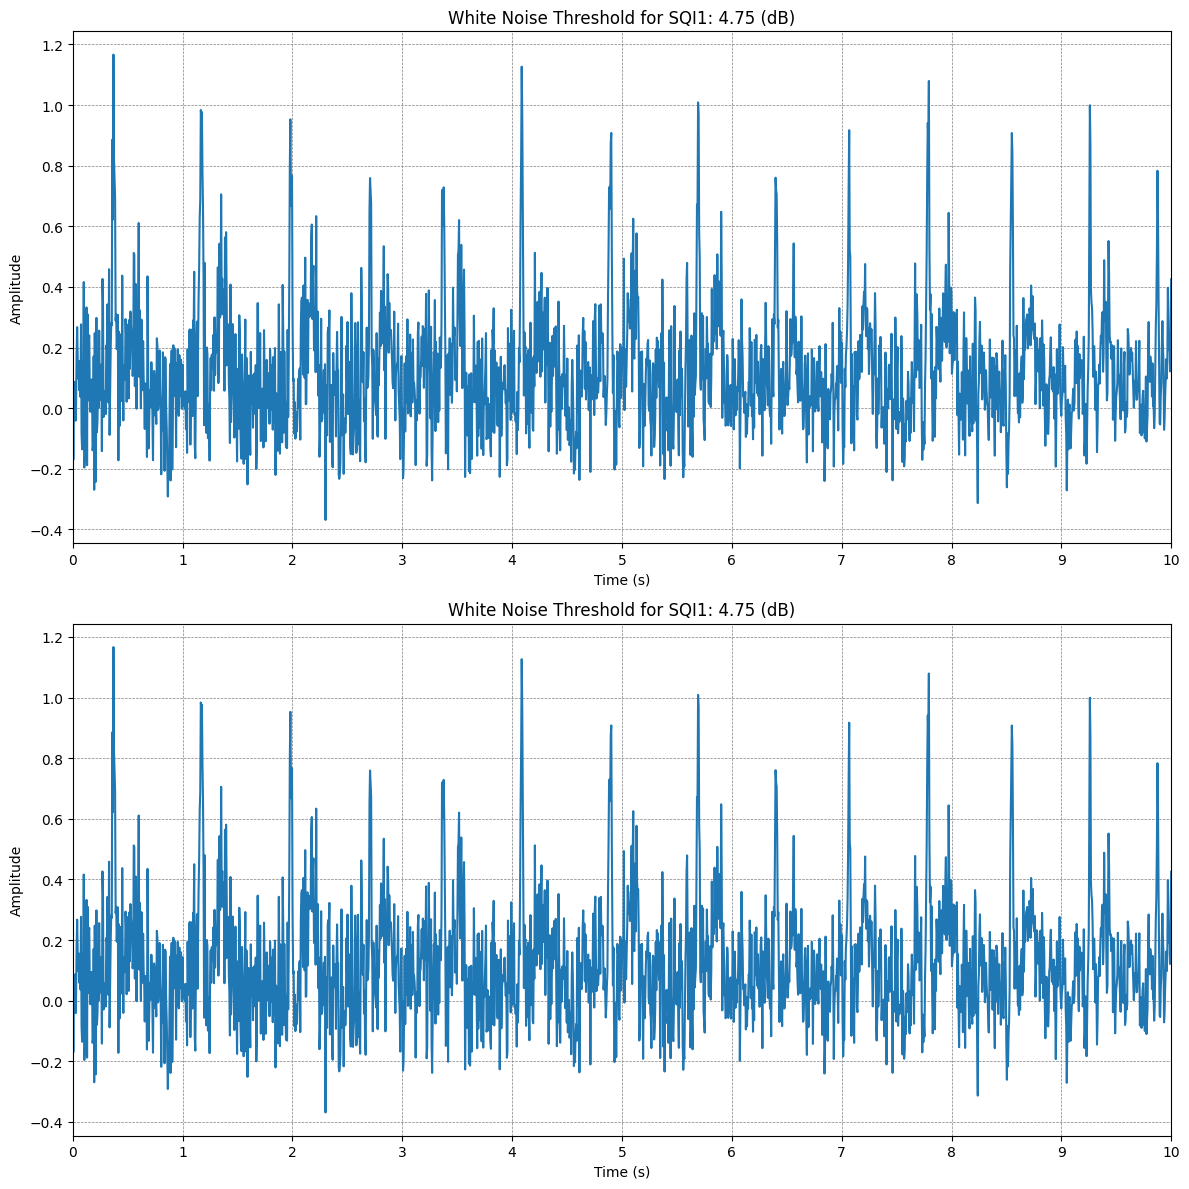

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming signal_2 and signal_3 are already defined and generated

plt.figure(figsize=(12, 12))
total_time = 10
time = np.linspace(0, total_time, len(signal_2))

# Plot for signal_2
plt.subplot(2, 1, 1)
plt.plot(time, signal_2)
plt.grid(True, which='both', linestyle='--', color='gray', linewidth=0.5)
plt.title('White Noise Threshold for SQI1: 4.75 (dB)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.xticks(np.arange(0, 11, 1))
plt.xlim(0, 10)

# Plot for signal_3
plt.subplot(2, 1, 2)
plt.plot(time, signal_3)
plt.grid(True, which='both', linestyle='--', color='gray', linewidth=0.5)
plt.title('White Noise Threshold for SQI1: 4.75 (dB)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.xticks(np.arange(0, 11, 1))
plt.xlim(0, 10)

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ecg_generator as eg  # Assuming this is the module you are using

# Generate the clean ECG signal
ecg = eg.ECGGenerator()
ecg.beat_interval_generator.beat_intervals = beats2
ecg.noise_generator.noise_type.wn = 0  # No white noise
signal, peaks, labels, beats = ecg.generate()

# Get the first 10 seconds of the signal
signal = signal[:2000]

# Plot the clean signal
plt.plot(signal)
plt.title('Clean ECG Signal')
plt.show()

# Calculate the signal power for the clean signal
N = len(signal)
squared_signal = np.square(signal)
sum_squared_signal = np.sum(squared_signal)
signal_power = sum_squared_signal / N

# Given noise power (sigma^2)
sigma_sq = 24

# Calculate SNR based on the clean signal power and noise power
SNR = signal_power / sigma_sq
SNR_dB = 10 * np.log10(SNR)

print("Clean Signal Power:", signal_power)
print("SNR (linear scale):", SNR)
print("SNR (dB):", SNR_dB)

# Generate the noisy ECG signal
ecg = eg.ECGGenerator()
ecg.beat_interval_generator.beat_intervals = beats2
ecg.noise_generator.noise_type.wn = 24  # Set white noise to 2
signal_2, peaks, labels, beats = ecg.generate()
signal_2 = signal_2[:2000]

# Plot the noisy signal
plt.plot(signal_2)
plt.title('ECG Signal with White Noise')
plt.show()

# Calculate the signal power for the noisy signal
squared_signal_2 = np.square(signal_2)
sum_squared_signal_2 = np.sum(squared_signal_2)
signal_power_2 = sum_squared_signal_2 / N

print("Signal Power (with added WN):", signal_power_2)

# Additional Verification
# Calculate the noise added
noise_added = signal_2 - signal
squared_noise = np.square(noise_added)
sum_squared_noise = np.sum(squared_noise)
noise_power = sum_squared_noise / N

print("Noise Power:", noise_power)

# Calculate the SNR directly from the noisy signal
SNR_noisy = signal_power_2 / noise_power
SNR_noisy_dB = 10 * np.log10(SNR_noisy)

print("SNR from Noisy Signal (linear scale):", SNR_noisy)
print("SNR from Noisy Signal (dB):", SNR_noisy_dB)


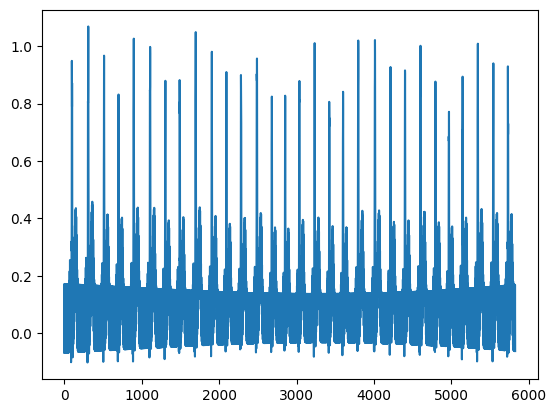

In [41]:
ecg = eg.ECGGenerator()
ecg.noise_generator.noise_type = ng.NoiseType(name='model', c=0, wn=0, duration=30,
                                              point_bool=True, point_freq=0.5, point_value=50)

noisy_signal4, peaks4, labels4, beats4 = ecg.generate()

plt.plot(noisy_signal4)

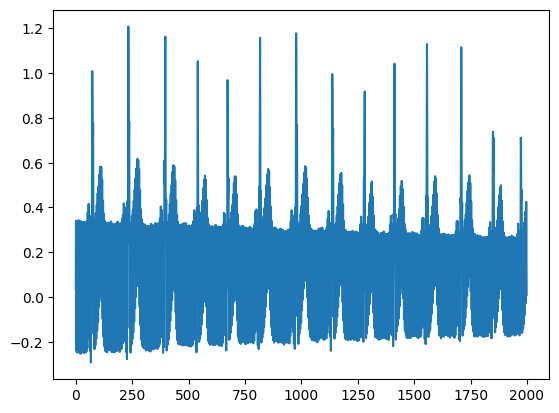

In [43]:
# Generate the noisy ECG signal
ecg = eg.ECGGenerator()
ecg.beat_interval_generator.beat_intervals = beats2
ecg.noise_generator.noise_type.point_bool = True
ecg.noise_generator.noise_type.point_freq = 0.5
ecg.noise_generator.noise_type.point_value = 170 # set PLI to 5
signal_2, peaks, labels, beats = ecg.generate()
signal_2 = signal_2[:2000]

plt.plot(signal_2)



In [5]:
#now lets calculate the SNR using the clean ecg / spectral height of the WN
ecg = eg.ECGGenerator()
ecg.beat_interval_generator.beat_intervals = beats2
ecg.noise_generator.noise_type.wn = 0
signal, peaks, labels, beats = ecg.generate()

#get first 10 seconds of the signal
signal = signal[0:2000]
N = len(signal)
seconds = 10

# Step 1: Square the signal values
squared_signal = np.square(signal)

# Step 2: Compute the mean of the squared values to get the power
sum_squared_signal = np.sum(squared_signal)

signal_power = sum_squared_signal/N

#now usign the sigma value from equation calculate the SNR

N02 = 0.035

#N02 = wn**2

SNR = signal_power / (N02)

print("Signal Power:", signal_power)

print("WN spectral height:", N02)

print("SNR:", SNR)

#to convert to db: Psignal(bd) = 10log10(Psignal/Pnoise)

SNR_db = 10*np.log10(SNR)

print("SNR (db):", SNR_db)

Signal Power: 0.03558720379474616
WN spectral height: 0.035
SNR: 1.0167772512784616
SNR (db): 0.07225821028687744


Signal Power of clean ECG: 0.03535852277105854
SNR of clean(er) signal: -17.52535883151542
SNR of noisy signal: -36.21767602882518


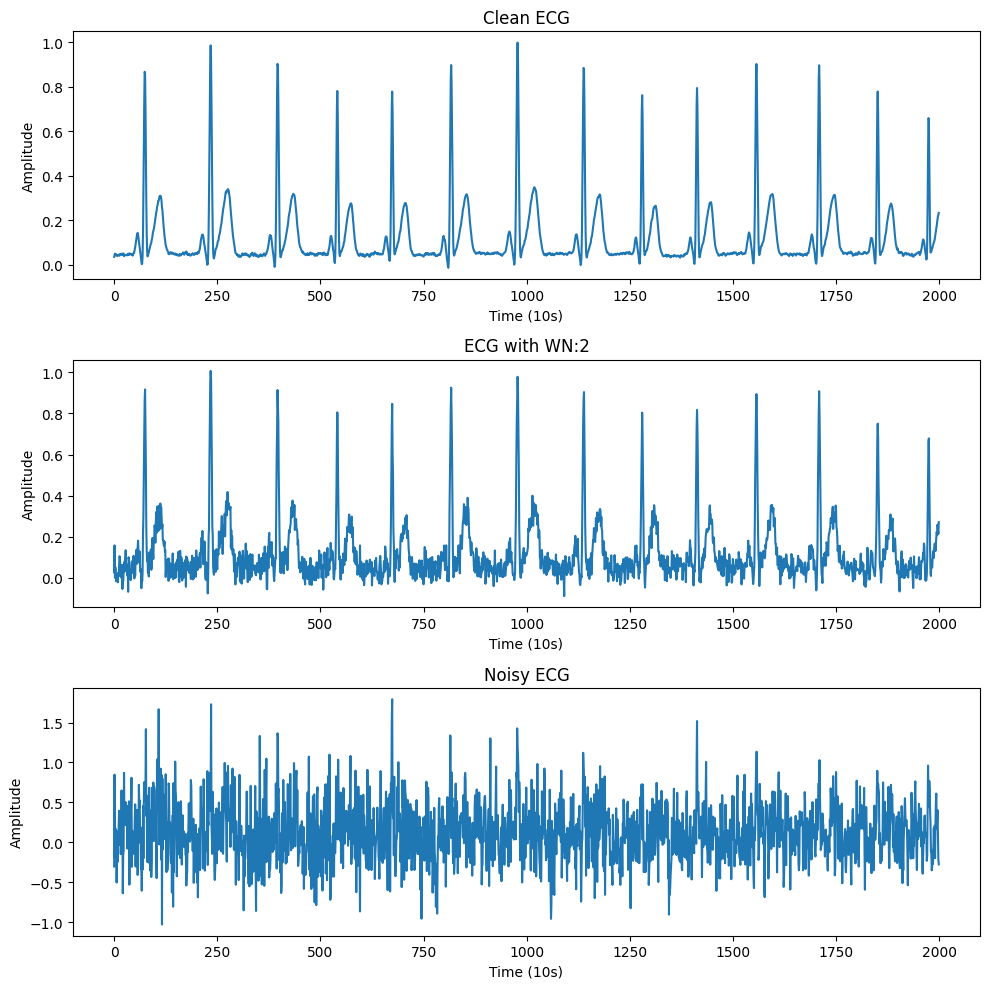

In [9]:
#first generate a clean ECG to use to calculate power of signal without noise:
ecg = eg.ECGGenerator()
ecg.beat_interval_generator.beat_intervals = beats2
ecg.noise_generator.noise_type.wn = 0
signal_c, peaks, labels, beats = ecg.generate()
signal_c = signal_c[0:2000]
N = len(signal_c)

#calculate the signal power of clean ecg
squared_signal = np.square(signal_c)
sum_squared_signal = np.sum(squared_signal)
signal_power = sum_squared_signal/N
print(f"Signal Power of clean ECG:", signal_power)

#plot clean ecg signal
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))
ax1.plot(signal_c)
ax1.set_title(f"Clean ECG")
ax1.set_xlabel("Time (10s)")
ax1.set_ylabel("Amplitude")


#now lets calculate the SNR using small amount of whitenoise (db ~ 0)
wn = 2
SNR_1 = signal_power / (wn)
SNR_1 = 10*np.log10(SNR_1)
print(f"SNR of clean(er) signal:", SNR_1)

ecg = eg.ECGGenerator()
ecg.beat_interval_generator.beat_intervals = beats2
ecg.noise_generator.noise_type.wn = wn
signal_1, peaks, labels, beats = ecg.generate()
signal_1 = signal_1[0:2000]

# plot cleaner signal
ax2.plot(signal_1)
ax2.set_title(f"ECG with WN:2")
ax2.set_xlabel("Time (10s)")
ax2.set_ylabel("Amplitude")


#now lets calculate the SNR using more whitenoise (db ~ ?)
wn = 148
SNR_2 = signal_power / wn
SNR_2 = 10*np.log10(SNR_2)
print(f"SNR of noisy signal:", SNR_2 )

ecg = eg.ECGGenerator()
ecg.beat_interval_generator.beat_intervals = beats2
ecg.noise_generator.noise_type.wn = wn
signal_n, peaks, labels, beats = ecg.generate()
signal_n = signal_n[0:2000]

# Plot noisy ECG
ax3.plot(signal_n)
ax3.set_title(f"Noisy ECG")
ax3.set_xlabel("Time (10s)")
ax3.set_ylabel("Amplitude")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

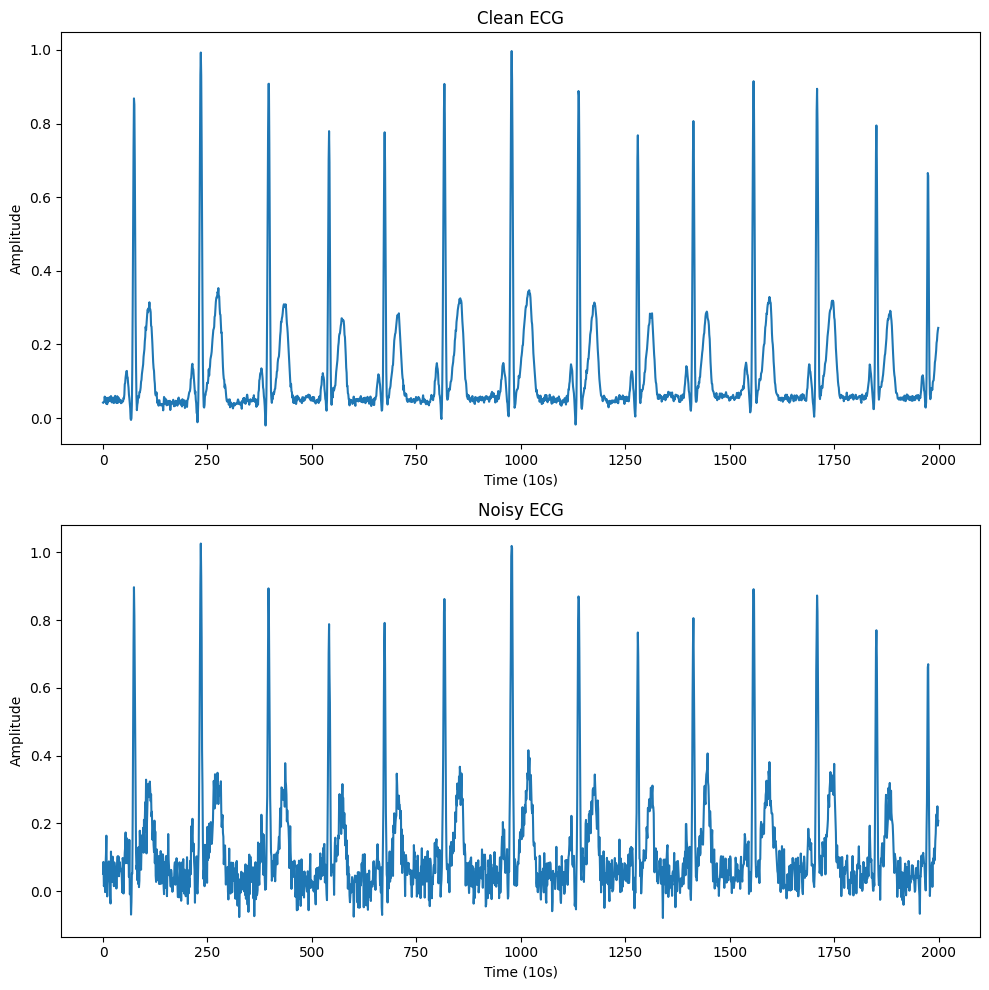

In [28]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# First plot
ax1.plot(signal_c)
ax1.set_title("Clean ECG")
ax1.set_xlabel("Time (10s)")
ax1.set_ylabel("Amplitude")

# Second plot
ax2.plot(signal_n)
ax2.set_title("Noisy ECG")
ax2.set_xlabel("Time (10s)")
ax2.set_ylabel("Amplitude")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
#now lets calculate the SNR using the clean ecg / spectral height of the WN
ecg = eg.ECGGenerator()
ecg.beat_interval_generator.beat_intervals = beats2
ecg.noise_generator.noise_type.wn = 0
signal, peaks, labels, beats = ecg.generate()

#get first 10 seconds of the signal
signal = signal[0:2000]
seconds = 10

# Step 1: Square the signal values
squared_signal = np.square(signal)

# Step 2: Compute the mean of the squared values to get the power
sum_squared_signal = np.sum(squared_signal)

signal_power = sum_squared_signal/N


#now usign the sigma value from equation calculate the SNR

N02 = 2

#N02 = wn**2

SNR = signal_power / N02

print("Signal Power:", signal_power)

print("WN spectral height:", N02)

print("SNR:", SNR)

#to convert to db: Psignal(bd) = 10log10(Psignal/Pnoise)

SNR_db = 10*np.log10(SNR)

print("SNR (db):", SNR_db)

Signal Power: 0.036389459458440396
WN spectral height: 2
SNR: 0.018194729729220198
SNR (db): -17.40054391189593


In [ ]:
#now lets calculate the SNR using the clean ecg / spectral height of the WN
ecg = eg.ECGGenerator()
ecg.beat_interval_generator.beat_intervals = beats2
ecg.noise_generator.noise_type.wn = 0
signal, peaks, labels, beats = ecg.generate()

#get first 10 seconds of the signal
signal = signal[0:2000]

# Step 1: Square the signal values
squared_signal = np.square(signal)

# Step 2: Compute the mean of the squared values to get the power
sum_squared_signal = np.sum(squared_signal)

signal_power = sum_squared_signal/N


#now take the power of the noise from the point_value

pv = 60

SNR = signal_power / (pv/6)

print("Signal Power:", signal_power)


print("SNR:", SNR)

#to convert to db: Psignal(bd) = 10log10(Psignal/Pnoise)

SNR_db = 10*np.log10(SNR)

print("SNR (db):", SNR_db)

Signal Power: 0.03566092968643001
SNR: 0.003566092968643001
SNR (db): -24.478073388829472


In [ ]:
wn = 2

N02 = wn**2

SNR = signal_power / N02

print("Signal Power:", signal_power)

print("WN spectral height:", N02)

print("SNR:", SNR)

Signal Power: 0.03623933512470391
WN spectral height: 4
SNR: 0.009059833781175978


In [ ]:
#to convert to db then Psignal(bd) = 10log10(Psignal/Pnoise)

SNR_db = 10*np.log10(SNR)

print("SNR (db):", SNR_db)

SNR (db): -20.428797701576535


In [ ]:
#generate a signal with the white noise
ecg = eg.ECGGenerator()
ecg.beat_interval_generator.beat_intervals = beats2
ecg.noise_generator.noise_type.wn = 2
signal, peaks, labels, beats = ecg.generate()
signal_wn = signal[0:2000]

#get the total power of this

# Step 1: Square the signal values
squared_signal = np.square(signal_wn)

# Step 2: Compute the mean of the squared values to get the power
sum_squared_signal = np.sum(squared_signal)

signal_power_wn = sum_squared_signal/N

print("Signal Power:", signal_power_wn)

signal_p_onlywn = signal_power_wn - signal_power

print("Signal Power_wn:", signal_p_onlywn)

SNR_2 = signal_power / signal_p_onlywn

print("SNR method 2:", SNR_2)


SNR2_db = 10*np.log10(SNR_2)

print("SNR (db):", SNR2_db)



Signal Power: 0.03704797967110869
Signal Power_wn: 0.0008086445464047798
SNR method 2: 44.81491316032909
SNR (db): 16.514225592098736
